In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('T2YN.csv', index_col = 0, skiprows=0)
df=df.reset_index()
print(df.shape)
df.head(10)

(83, 8)


,Date,Price,Open,High,Low,Vol.,Change %,Date_m
0,01-Nov-17,107.63,107.67,107.67,107.62,432000,-0.05,43040
1,02-Nov-17,107.66,107.65,107.69,107.63,334000,0.03,43041
2,03-Nov-17,107.63,107.66,107.70,107.60,288000,-0.03,43042
3,06-Nov-17,107.64,107.64,107.66,107.62,285000,0.01,43045
4,07-Nov-17,107.63,107.63,107.64,107.62,265000,-0.01,43046
5,08-Nov-17,107.61,107.62,107.64,107.59,242000,-0.02,43047
6,09-Nov-17,107.64,107.60,107.64,107.59,424000,0.03,43048
7,10-Nov-17,107.59,107.62,107.63,107.58,286000,-0.05,43049
8,13-Nov-17,107.54,107.59,107.61,107.52,281000,-0.05,43052
9,14-Nov-17,107.52,107.53,107.55,107.51,370000,-0.02,43053


In [12]:
df=df.drop("Date",axis=1,inplace=False);
df=df.drop("Vol.",axis=1,inplace=False);
df=df.drop("Change %",axis=1,inplace=False);
df=df.drop("Low",axis=1,inplace=False);
df=df.drop("High",axis=1,inplace=False);
df=df.drop("Open",axis=1,inplace=False);
y =  df["Price"]
X = df.drop(["Price"],axis=1,inplace=False)
df.head(10)

,Price,Date_m
0,107.63,43040
1,107.66,43041
2,107.63,43042
3,107.64,43045
4,107.63,43046
5,107.61,43047
6,107.64,43048
7,107.59,43049
8,107.54,43052
9,107.52,43053


In [13]:
import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("pred set shape: %s" %(y_pred.shape[0]) )
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))



train set shape: 58, 58
test set shape: 25, 58
pred set shape: 25
mse = 0.0025859235498112117, rmse = 0.050851976852539484 
mae = 0.041947885535047365 r2 = 0.9838244550581086


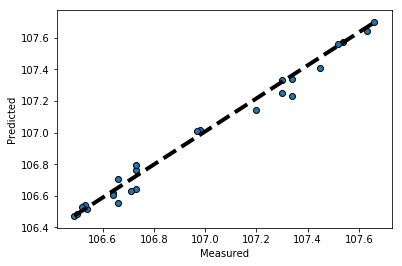

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [15]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
df.head(10)

,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


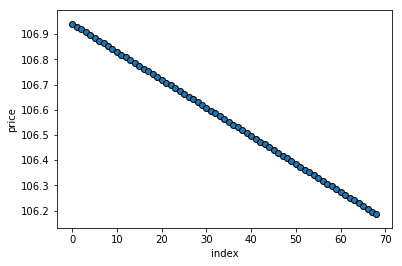

In [16]:
X_test = df
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test.index,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('index')
ax.set_ylabel('price')
plt.show()


In [17]:

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=123)


print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

train set shape: 83, 83
test set shape: 0, 83


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

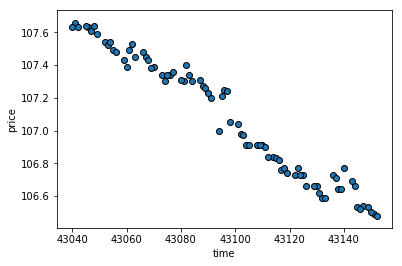

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()


In [19]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
X_test = df

X_test.head(10)


,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


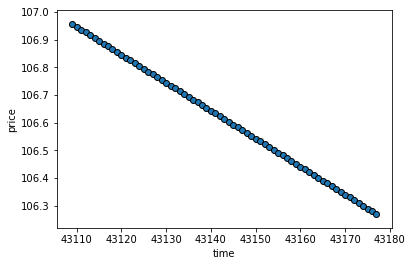

In [20]:
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()

prediction = pd.DataFrame(X_test,y_pred).to_csv('prediction_2YTN.csv')
